In [ ]:
## Assignment 7 - Linear Regression
## Predicting Taxi Out Delay and performing Exploratory Data Analysis (EDA) 

## The dataset contains data about flights leaving from JFK airport between Nov 2019-Dec 2020. 

In [ ]:
## import libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
## Load the dataset 

data_flight = pd.read_csv("M1_final.csv")
data_flight.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [ ]:
data_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [ ]:
## Check how many flights departed by weather condition 
data_flight["Condition"].value_counts()

Condition
Mostly Cloudy            9124
Fair                     5038
Cloudy                   4992
Partly Cloudy            3209
Light Rain               1865
Mostly Cloudy / Windy    1442
Fair / Windy              918
Partly Cloudy / Windy     582
Rain                      351
Cloudy / Windy            341
Light Rain / Windy        288
Light Drizzle             194
Fog                       147
Wintry Mix                 83
Light Snow                 76
Heavy Rain                 54
Fog / Windy                28
Rain / Windy               25
Light Snow / Windy         24
Light Drizzle / Windy      18
Heavy Rain / Windy          6
Drizzle and Fog             5
Light Freezing Rain         4
Wintry Mix / Windy          4
Snow                        2
Name: count, dtype: int64

In [ ]:
## Check the dataset for any missing values

data_flight.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [ ]:
df = data_flight

In [ ]:
# Claculate the mode of the wind variable and input missing values 
mode = df["Wind"].mode().values[0]
df["Wind"].fillna(mode, inplace=True)

C:\Users\johnm\AppData\Local\Temp\ipykernel_42056\3702308167.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Wind"].fillna(mode, inplace=True)


In [ ]:
## Check again that dataset is complete 
df.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 0
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

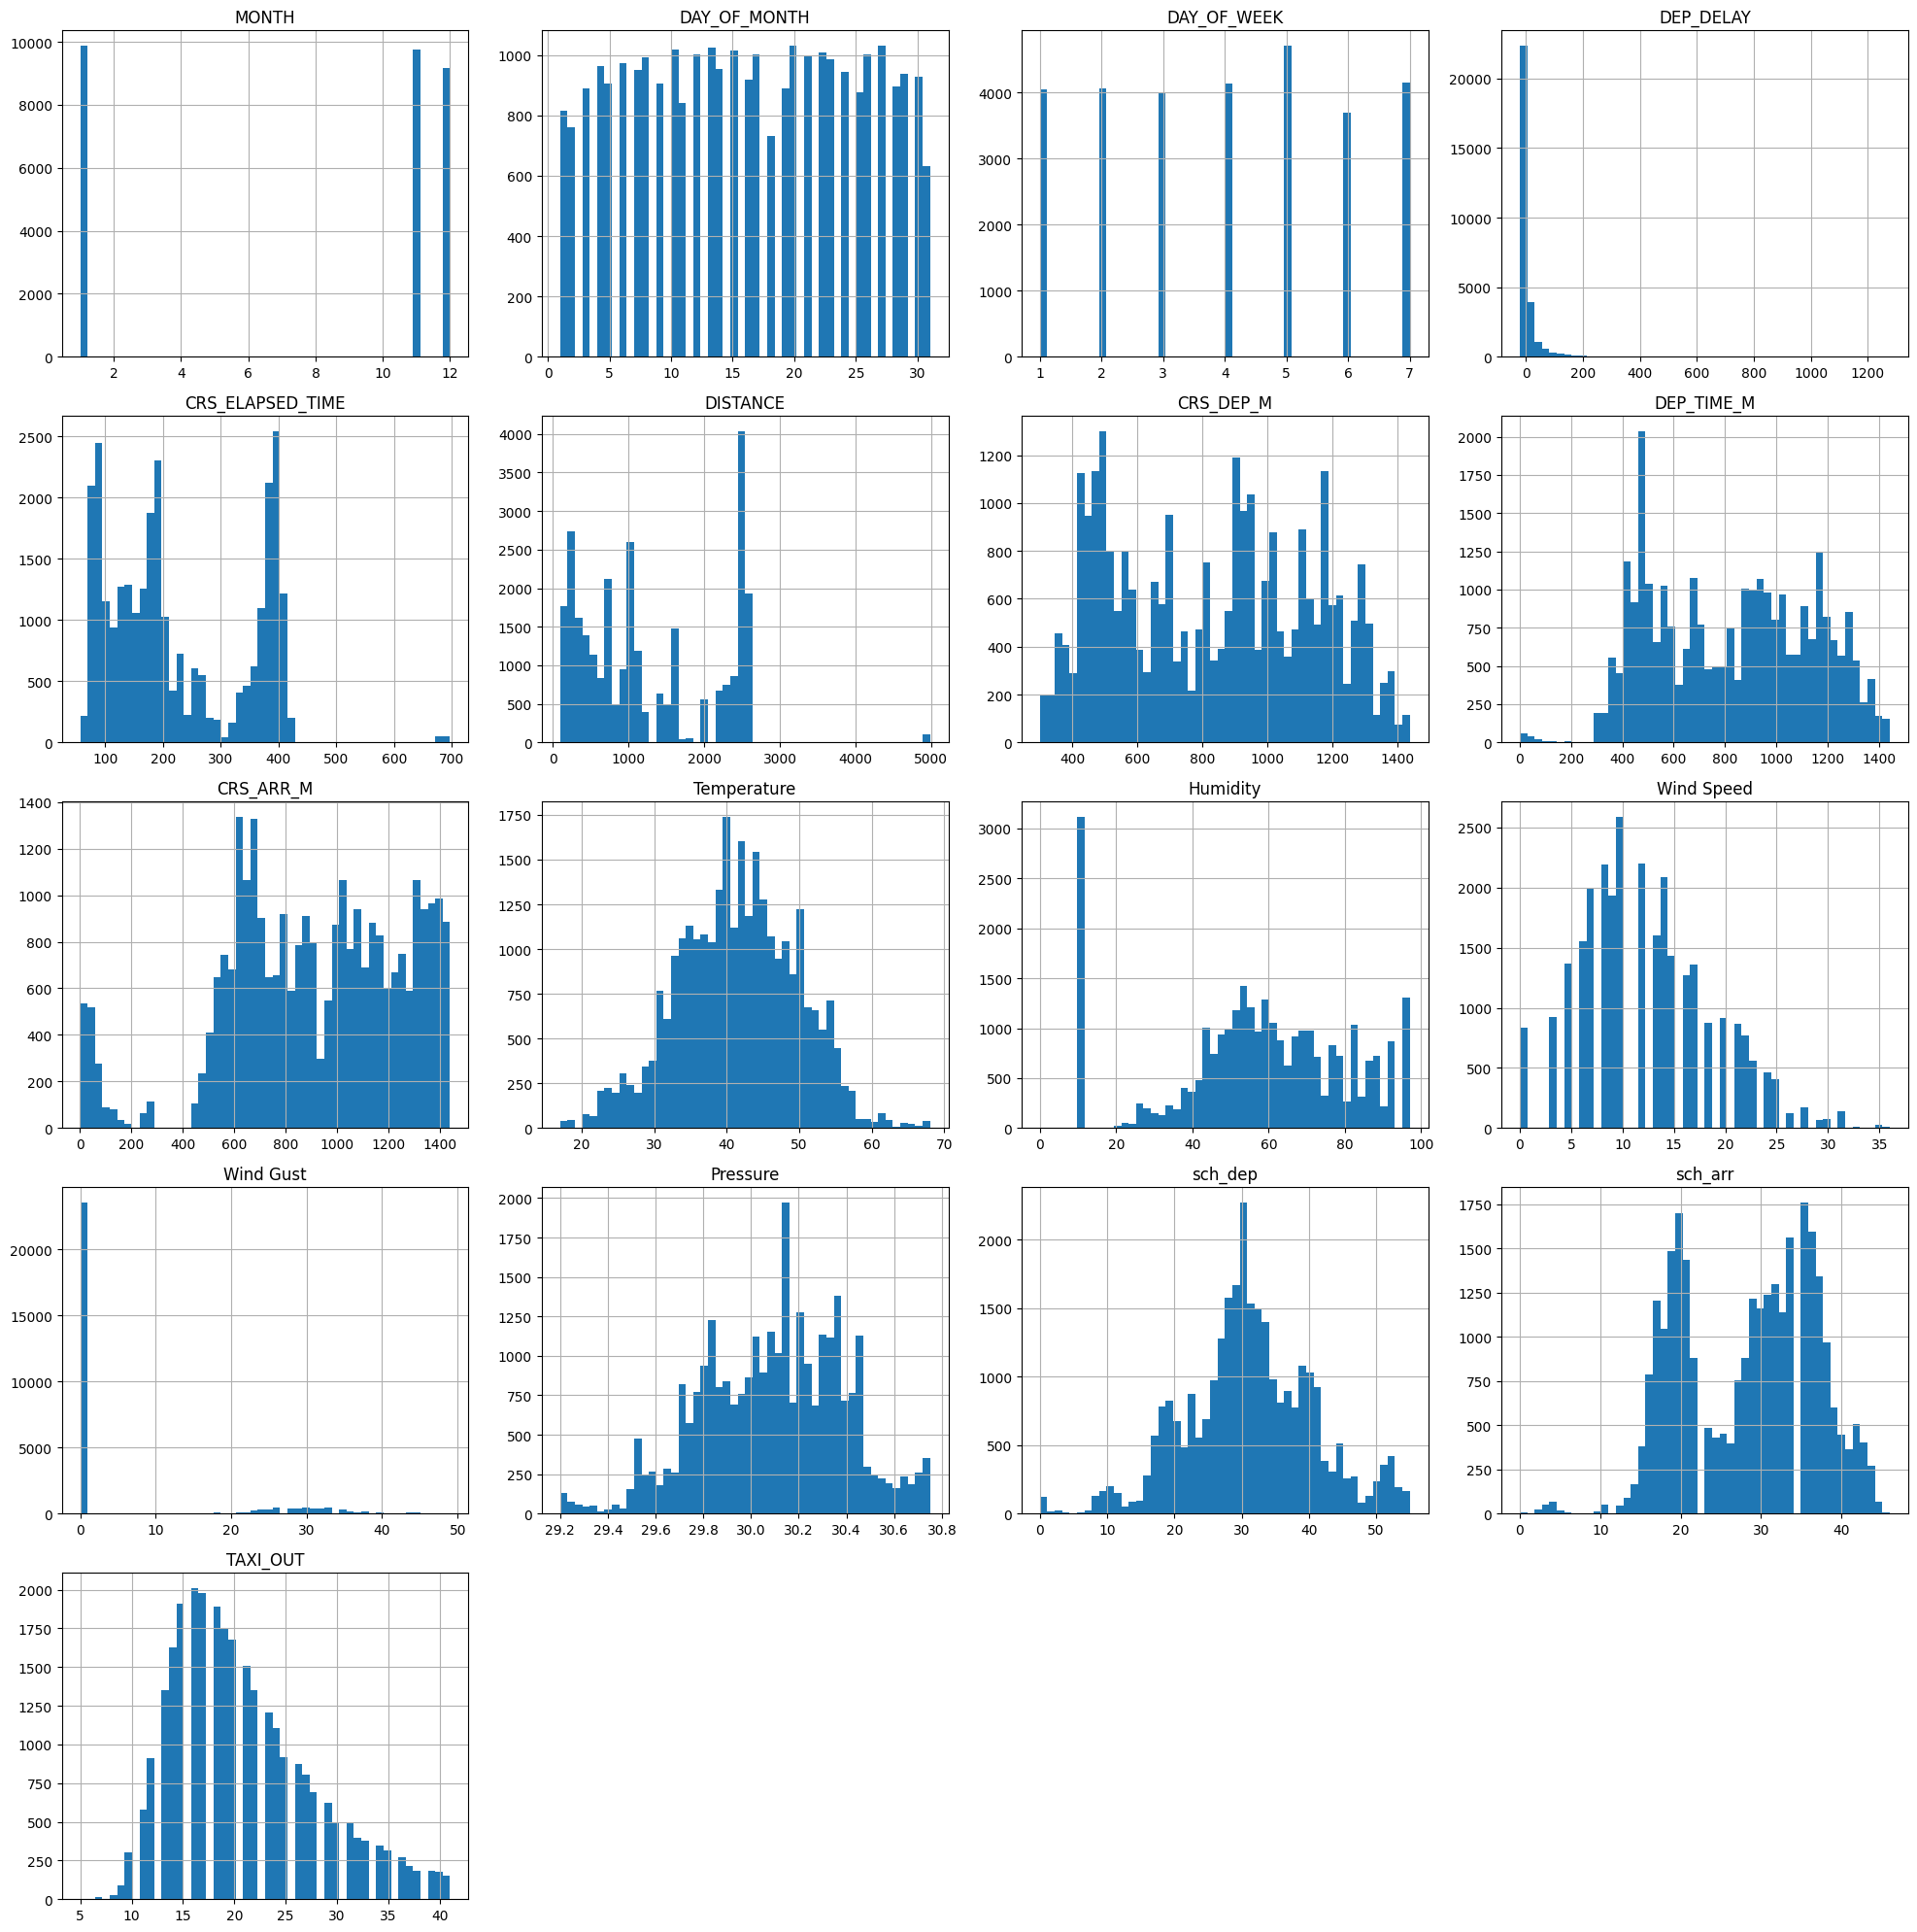

In [ ]:
## Visually check the data 

df.hist(bins=50, figsize=(20, 20))
plt.tight_layout()    

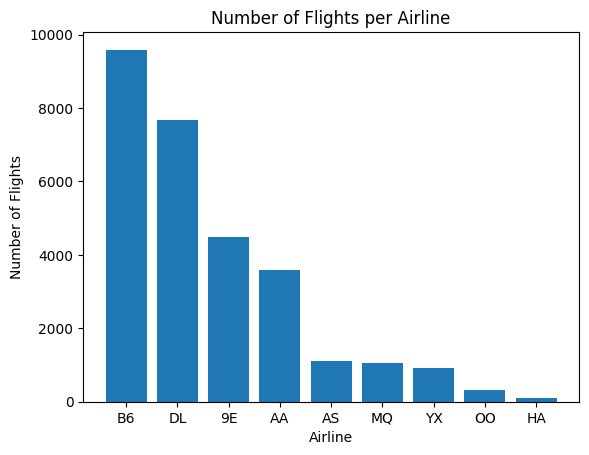

In [ ]:
## Number of flights per airline
counts = df['OP_UNIQUE_CARRIER'].value_counts()
plt.bar(counts.index, counts.values)
plt.title("Number of Flights per Airline")
plt.xlabel("Airline")
plt.ylabel("Number of Flights")
plt.show()

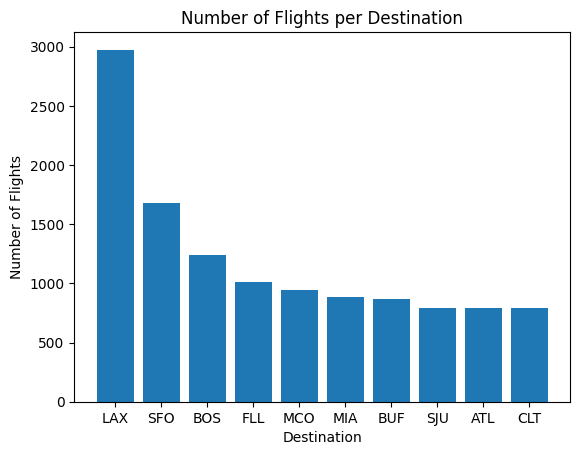

In [ ]:
## Number of flights per destination  
dest_counts = df['DEST'].value_counts().head(10)
plt.bar(dest_counts.index, dest_counts.values)
plt.title("Number of Flights per Destination")
plt.xlabel("Destination")
plt.ylabel("Number of Flights")
plt.show()

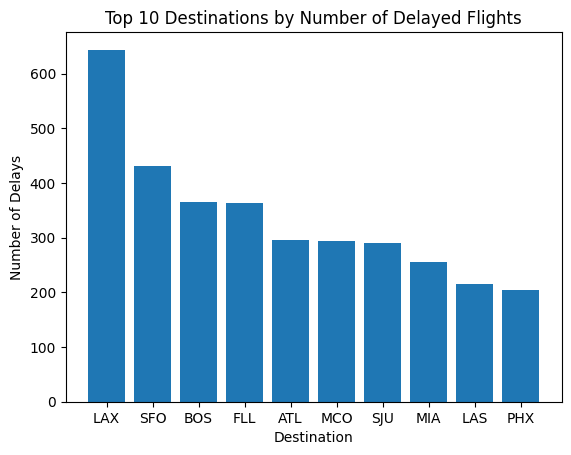

In [ ]:
## Number of delays per destination 
delayed_flights = df[df['DEP_DELAY'] > 0]
delay_counts = delayed_flights['DEST'].value_counts().head(10)  # Top 10 destinations with most delays
plt.bar(delay_counts.index, delay_counts.values)
plt.title("Top 10 Destinations by Number of Delayed Flights")
plt.xlabel("Destination")
plt.ylabel("Number of Delays")
plt.show()

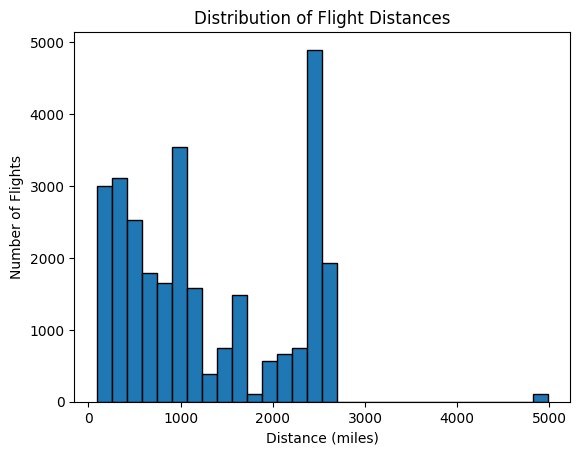

In [ ]:
## Number of flights per deistance

plt.hist(df['DISTANCE'], bins=30, edgecolor='black')
plt.title("Distribution of Flight Distances")
plt.xlabel("Distance (miles)")
plt.ylabel("Number of Flights")
plt.show()

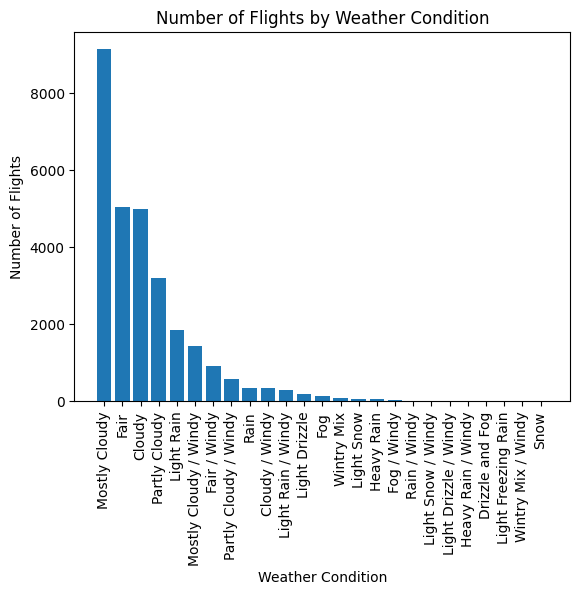

In [ ]:
## Number of flights by weather condition
condition_counts = df['Condition'].value_counts()
plt.bar(condition_counts.index, condition_counts.values)
plt.title("Number of Flights by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Flights")
plt.xticks(rotation=90)
plt.show()

C:\Users\johnm\AppData\Local\Temp\ipykernel_42056\2853928358.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=conditions)


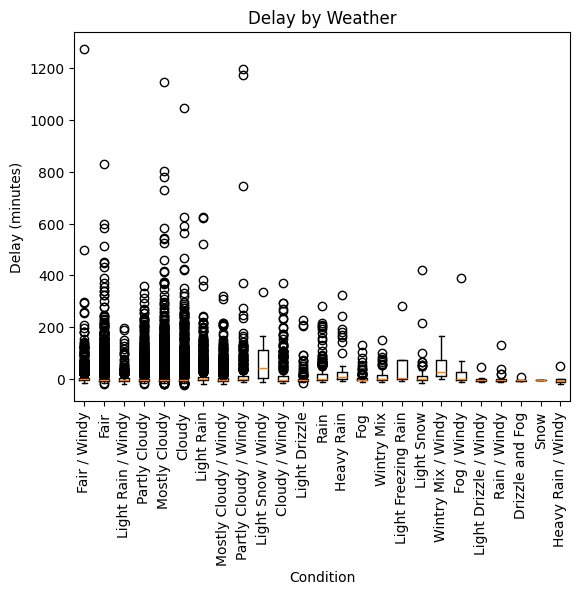

In [ ]:
## Delay by weather condition 
conditions = df['Condition'].unique()
data = [df[df['Condition'] == c]['DEP_DELAY'] for c in conditions]

plt.boxplot(data, labels=conditions)
plt.title("Delay by Weather")
plt.xlabel("Condition")
plt.ylabel("Delay (minutes)")
plt.xticks(rotation=90)
plt.show()

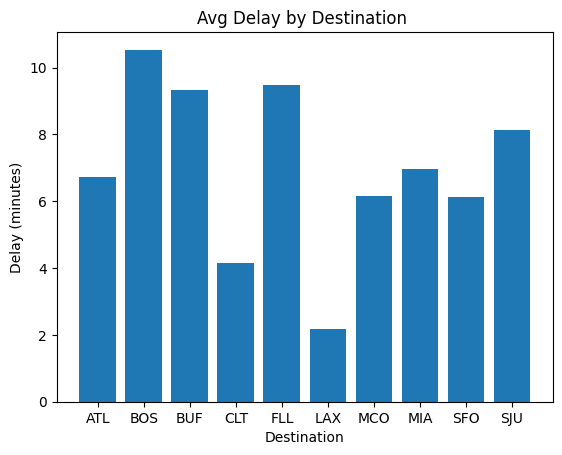

In [ ]:
## Top 10 delays be destination
top = df['DEST'].value_counts().nlargest(10).index
group = df[df['DEST'].isin(top)].groupby('DEST')['DEP_DELAY'].mean()

plt.bar(group.index, group.values)
plt.title("Avg Delay by Destination ")
plt.xlabel("Destination")
plt.ylabel("Delay (minutes)")
plt.show()

C:\Users\johnm\AppData\Local\Temp\ipykernel_42056\3853700634.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=airlines)


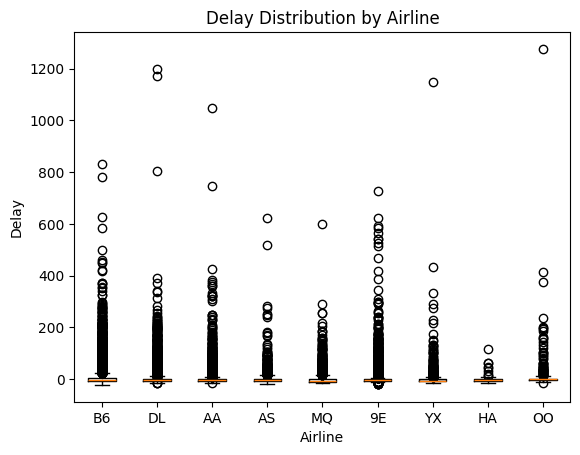

In [ ]:
airlines = df['OP_UNIQUE_CARRIER'].unique()
data = [df[df['OP_UNIQUE_CARRIER'] == a]['DEP_DELAY'] for a in airlines]

plt.boxplot(data, labels=airlines)
plt.title("Delay Distribution by Airline")
plt.xlabel("Airline")
plt.ylabel("Delay")
plt.show()

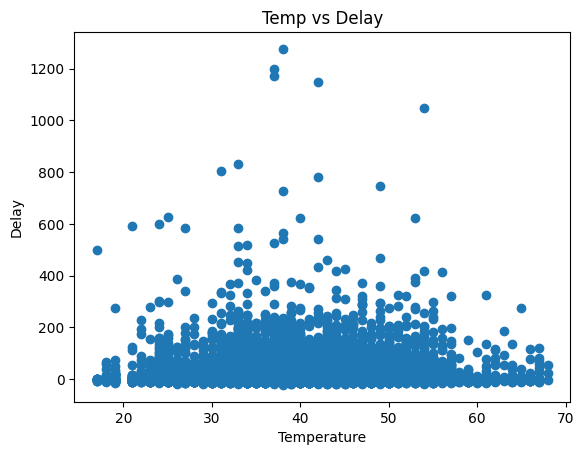

In [ ]:
## Temperature vs delay
plt.scatter(df['Temperature'], df['DEP_DELAY'])
plt.title("Temp vs Delay")
plt.xlabel("Temperature")
plt.ylabel("Delay")
plt.show()

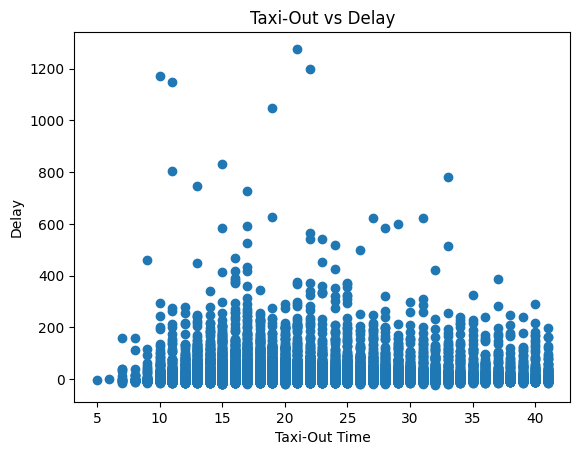

In [ ]:
## Taxi out by delay
plt.scatter(df['TAXI_OUT'], df['DEP_DELAY'])
plt.title("Taxi-Out vs Delay")
plt.xlabel("Taxi-Out Time")
plt.ylabel("Delay")
plt.show()

In [ ]:
data_flight.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [ ]:
### SIMPLE LINEAR REGRESSION ###
# Specify the X and y variables
X = data_flight['DEP_DELAY']
y = data_flight['TAXI_OUT']

In [ ]:
## Training and splitting the model 
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.2, random_state=32)

In [ ]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [ ]:
lin_reg = LinearRegression()  # create a linear regression object
lin_reg.fit(X_train, y_train)  # perform the linear regression

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
## Making predictions based on the model 
y_pred = lin_reg.predict(X_test) 

In [ ]:
## Creating a dataframe for predictions
##Create a data frame fr predictions 
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
9362,23,20.767561
23840,14,20.946881
24617,22,20.792294
24899,19,20.773744
2007,20,20.823212
...,...,...
25685,18,20.829395
376,16,20.773744
10922,34,20.786111
7106,17,20.798478


In [ ]:
## Validating Accuracy
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('R2:', metrics.r2_score(y_test, y_pred))


MSE: 47.86709056697605
R2: 0.0013034144832426708


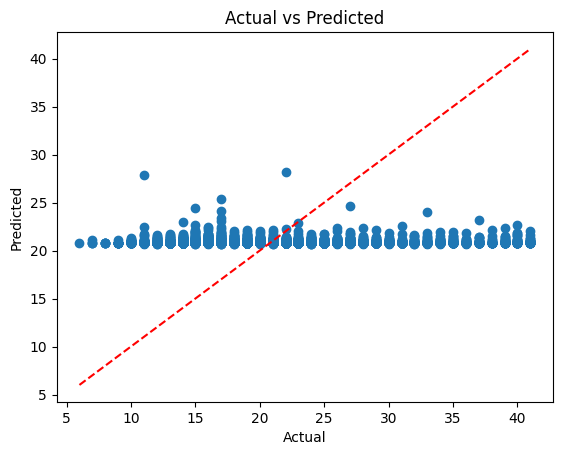

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
plt.show()

In [ ]:
### MULTIPLE LINEAR REGRESSION ###
# Specify the X and y variables
x = data_flight[['MONTH','DEP_DELAY','DAY_OF_WEEK','DAY_OF_MONTH','CRS_ELAPSED_TIME','DISTANCE','DEP_TIME_M','CRS_ARR_M','Temperature','Dew Point','Humidity','Wind Speed','Wind Gust','Pressure','sch_dep','sch_arr']]
Y = data_flight['TAXI_OUT']

In [ ]:
## Training and splitting the model 
x_train, x_test, Y_train, Y_test = train_test_split (x,Y, test_size=0.2, random_state=32)

In [ ]:
lin_reg = LinearRegression()  # create a linear regression object
lin_reg.fit(x_train, Y_train)  # perform the linear regression

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
## Making predictions based on the model 
Y_pred = lin_reg.predict(x_test) 


In [ ]:
## Creating a dataframe for predictions
##Create a data frame fr predictions 
pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

,Actual,Predicted
9362,23,22.411617
23840,14,22.070788
24617,22,22.843607
24899,19,24.740039
2007,20,18.562278
...,...,...
25685,18,20.040644
376,16,19.036486
10922,34,23.048122
7106,17,18.725753


In [ ]:
## Validating Accuracy
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('R2:', metrics.r2_score(Y_test, Y_pred))

MSE: 43.87153709099075
R2: 0.08466644253552846


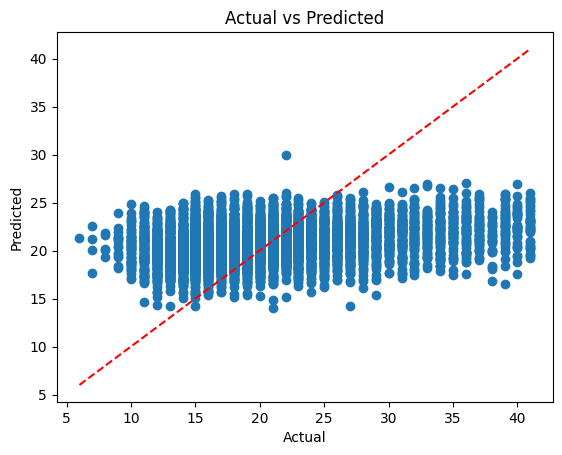

In [ ]:
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', label='Perfect Fit')
plt.show()

In [ ]:
### Using Ridge Regression ###

model_ridge = Ridge(alpha=1, random_state= 32)
model_ridge.fit(x_train, Y_train)


,alpha,1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,32


In [ ]:
## make predictions
pred_ridge = model_ridge.predict(x_test)
pd.DataFrame({'Actual': Y_test, 'Predicted': pred_ridge})

,Actual,Predicted
9362,23,22.411616
23840,14,22.070937
24617,22,22.843394
24899,19,24.740089
2007,20,18.562364
...,...,...
25685,18,20.040736
376,16,19.036443
10922,34,23.048110
7106,17,18.725724


In [ ]:
print('MSE:', metrics.mean_squared_error(Y_test, pred_ridge))
print('R2:', metrics.r2_score(Y_test, pred_ridge))

MSE: 43.87156116174376
R2: 0.08466594032454056


In [ ]:
### Using Lasso Regression ###
model_lasso = Lasso(alpha=1)
model_lasso.fit(x_train, Y_train)

,alpha,1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [ ]:
pred_lasso = model_lasso.predict(x_test)
pd.DataFrame({'Actual': Y_test, 'Predicted': pred_lasso})

,Actual,Predicted
9362,23,22.242018
23840,14,22.577857
24617,22,22.834464
24899,19,24.789844
2007,20,19.019903
...,...,...
25685,18,20.620220
376,16,19.474043
10922,34,22.352735
7106,17,18.421734


In [ ]:
print('MSE:', metrics.mean_squared_error(Y_test, pred_lasso))
print('R2:', metrics.r2_score(Y_test, pred_lasso))

MSE: 44.26863125300976
R2: 0.07638148978323767


In [ ]:
# ### Gaussian Naive Bayes
# data_flight.index = data_flight.iloc[:, 0]
# X = data_flight.iloc[:, 1:22]
# y = data_flight.iloc[:, 22]

In [ ]:
## split the dataset 
# ## rule of thumb, 80 percent for training and 20 percent for testing 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 32)

In [ ]:
# encoders = {}
# le = LabelEncoder()
# for col in categorical_cols:
#     X_train[col] = le.fit_transform(X_train[col])
    

In [ ]:
# ## create Gaussian Naive Bayes 
# clf = GaussianNB()
# clf.fit(X_train, y_train)

In [ ]:
# ## Make prediction 
# y_pred_gnb = clf.predict(X_test)
# y_pred_gnb

In [ ]:
# ## Put in dataframe 
# pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gnb})